In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages')

In [121]:
from Datos import Datos
import EstrategiaParticionado
import Clasificador

import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

from tabulate import tabulate

In [5]:
final_results_dict = {}

# <font color='red'>1. Entrenamiento y clasificación con Clasificador.py</font>


## <font color='blue'> 1.1 Dataset tic-tac-toe </font>

In [52]:
dataset_ttt = Datos("../ConjuntosDatos/tic-tac-toe.data")
ndata, ncols = dataset_ttt.datos.shape # nfeat = ncols-1 
print("Numero de ejemplos de entrenamiento:", ndata, ", Numero de columnas:", ncols)

Numero de ejemplos de entrenamiento: 958 , Numero de columnas: 10


In [53]:
np.random.shuffle(dataset_ttt.datos)

NB = Clasificador.ClasificadorNaiveBayes()

### 1.1.1 Validación simple

In [54]:
strat_simple = EstrategiaParticionado.ValidacionSimple(0.8)

In [55]:
errores = NB.validacion(strat_simple, dataset_ttt, NB)
print(errores)

# We will use this result later
final_results_dict['clasificador_val_simple_ttt'] = [np.mean(errores), np.std(errores)]

[0.296875]


### 1.1.2 Validación simple con varias repeticiones (3 reps)

In [56]:
strat_simple_rep3 = EstrategiaParticionado.ValidacionSimple(0.8, nreps=3)

In [57]:
errores = NB.validacion(strat_simple_rep3, dataset_ttt, NB)
print("Errores:", errores)
print("Error medio:", np.mean(errores), "+-", np.std(errores))

# We will use this result later
final_results_dict['clasificador_val_simple_rep3_ttt'] = [np.mean(errores), np.std(errores)]

Errores: [0.30729166666666663, 0.328125, 0.3125]
Error medio: 0.3159722222222222 +- 0.00885246443332082


### 1.1.3 Validación Cruzada (5 folds)

In [58]:
strat_cross = EstrategiaParticionado.ValidacionCruzada(k_fold=5)

In [83]:
errores = NB.validacion(strat_cross, dataset_ttt, NB)
print("Errores:", errores)
print("Error medio:", np.mean(errores), "+-", np.std(errores))

# We will use this result later
final_results_dict['clasificador_cross_val_ttt'] = [np.mean(errores), np.std(errores)]

Errores: [0.31937172774869105, 0.2931937172774869, 0.3036649214659686, 0.2879581151832461, 0.2774869109947644]
Error medio: 0.2963350785340314 +- 0.014280818530875216


## <font color='blue'> 1.2 Dataset German </font>

In [60]:
dataset_ger = Datos("../ConjuntosDatos/german.data")
ndata, ncols = dataset_ger.datos.shape # nfeat = ncols-1 
print("Numero de ejemplos de entrenamiento:", ndata, ", Numero de columnas:", ncols)

Numero de ejemplos de entrenamiento: 1000 , Numero de columnas: 21


In [61]:
np.random.shuffle(dataset_ger.datos)

### 1.2.1 Validación simple

In [62]:
strat_simple_ger = EstrategiaParticionado.ValidacionSimple(0.8)
errores = NB.validacion(strat_simple_ger, dataset_ger, NB)

# We will use this result later
final_results_dict['clasificador_val_simple_ger'] = [np.mean(errores), np.std(errores)]

### 1.2.2 Validación simple con varias repeticiones (3 reps)

In [63]:
strat_simple_rep3_ger = EstrategiaParticionado.ValidacionSimple(0.8, nreps=3)
errores = NB.validacion(strat_simple_rep3_ger, dataset_ger, NB)
print("Errores:", errores)
print("Error medio:", np.mean(errores), "+-", np.std(errores))

# We will use this result later
final_results_dict['clasificador_val_simple_rep3_ger'] = [np.mean(errores), np.std(errores)]

Errores: [0.235, 0.21499999999999997, 0.235]
Error medio: 0.2283333333333333 +- 0.009428090415820642


### 1.2.3 Validación cruzada (5 folds)

In [64]:
strat_cross_ger = EstrategiaParticionado.ValidacionCruzada(k_fold=3)
errores = NB.validacion(strat_cross_ger, dataset_ger, NB)
print("Errores:", errores)
print("Error medio:", np.mean(errores), "+-", np.std(errores))

# We will use this result later
final_results_dict['clasificador_cross_val_ger'] = [np.mean(errores), np.std(errores)]

Errores: [0.2702702702702703, 0.26726726726726724, 0.2492492492492493]
Error medio: 0.2622622622622623 +- 0.009282901396892576


## <font color='green'> 1.3 Tablas de Resultados (Clasificador.py)</font>

###  1.3.1 Validación simple con número variable de repeticiones

In [18]:
def val_simple(percentage):
    max_reps = 5
    L = []
    for i in range(1, max_reps+1):
        L.append([])
        strat = EstrategiaParticionado.ValidacionSimple(percentage, nreps=i)
        errores_ttt = NB.validacion(strat, dataset_ttt, NB)
        errores_ger = NB.validacion(strat, dataset_ger, NB)
        L[i-1].append(str(i))
        L[i-1].append("%.2f +- %.3f"% (np.mean(errores_ttt), np.std(errores_ttt)))
        L[i-1].append("%.2f +- %.3f"% (np.mean(errores_ger), np.std(errores_ger)))
    print("Validación Simple con " + str(int(percentage*100)) +   "% Train\n")
    print(tabulate(L, headers = ["N_REPS", "TTT_DB", "GER_DB"], tablefmt="grid")) 

In [19]:
val_simple(0.70)

Validación Simple con 70% Train

+----------+---------------+---------------+
|   N_REPS | TTT_DB        | GER_DB        |
+==========+===============+===============+
|        1 | 0.31 +- 0.000 | 0.25 +- 0.000 |
+----------+---------------+---------------+
|        2 | 0.26 +- 0.009 | 0.28 +- 0.013 |
+----------+---------------+---------------+
|        3 | 0.30 +- 0.040 | 0.25 +- 0.013 |
+----------+---------------+---------------+
|        4 | 0.31 +- 0.034 | 0.25 +- 0.003 |
+----------+---------------+---------------+
|        5 | 0.31 +- 0.010 | 0.25 +- 0.009 |
+----------+---------------+---------------+


In [20]:
val_simple(0.75)

Validación Simple con 75% Train

+----------+---------------+---------------+
|   N_REPS | TTT_DB        | GER_DB        |
+==========+===============+===============+
|        1 | 0.31 +- 0.000 | 0.22 +- 0.000 |
+----------+---------------+---------------+
|        2 | 0.29 +- 0.006 | 0.28 +- 0.002 |
+----------+---------------+---------------+
|        3 | 0.31 +- 0.021 | 0.24 +- 0.018 |
+----------+---------------+---------------+
|        4 | 0.30 +- 0.020 | 0.23 +- 0.007 |
+----------+---------------+---------------+
|        5 | 0.29 +- 0.025 | 0.26 +- 0.012 |
+----------+---------------+---------------+


In [21]:
val_simple(0.80)

Validación Simple con 80% Train

+----------+---------------+---------------+
|   N_REPS | TTT_DB        | GER_DB        |
+==========+===============+===============+
|        1 | 0.32 +- 0.000 | 0.33 +- 0.000 |
+----------+---------------+---------------+
|        2 | 0.27 +- 0.023 | 0.24 +- 0.013 |
+----------+---------------+---------------+
|        3 | 0.28 +- 0.019 | 0.23 +- 0.031 |
+----------+---------------+---------------+
|        4 | 0.29 +- 0.024 | 0.24 +- 0.018 |
+----------+---------------+---------------+
|        5 | 0.30 +- 0.025 | 0.25 +- 0.021 |
+----------+---------------+---------------+


### 1.3.2 Validación cruzada

In [22]:
max_folds = 11
j = 0
L = []
for i in range(3, max_folds+1, 2):
    L.append([])
    strat = EstrategiaParticionado.ValidacionCruzada(k_fold=i)
    errores_ttt = NB.validacion(strat, dataset_ttt, NB)
    errores_ger = NB.validacion(strat, dataset_ger, NB)
    L[j].append(str(i))
    L[j].append("%.2f +- %.3f"% (np.mean(errores_ttt), np.std(errores_ttt)))
    L[j].append("%.2f +- %.3f"% (np.mean(errores_ger), np.std(errores_ger)))
    j+=1
print(tabulate(L, headers = ["K_FOLDS", "TTT_DB", "GER_DB"], tablefmt="grid"))

+-----------+---------------+---------------+
|   K_FOLDS | TTT_DB        | GER_DB        |
+===========+===============+===============+
|         3 | 0.29 +- 0.031 | 0.26 +- 0.012 |
+-----------+---------------+---------------+
|         5 | 0.29 +- 0.010 | 0.26 +- 0.036 |
+-----------+---------------+---------------+
|         7 | 0.29 +- 0.014 | 0.26 +- 0.032 |
+-----------+---------------+---------------+
|         9 | 0.31 +- 0.035 | 0.25 +- 0.053 |
+-----------+---------------+---------------+
|        11 | 0.30 +- 0.045 | 0.26 +- 0.047 |
+-----------+---------------+---------------+


# <font color='red'>2. Entrenamiento y clasificación con funciones de sklearn (encapsuladas en Clasificador.py)</font>

In [65]:
# Las funciones de sklearn requieren una codificación de los atributos discretos diferente a la nuestra.
# Por lo tanto, realizamos un pequeño trabajo de preprocesado de datos para que sus funciones de sklearn
# puiedan realizar un entrenamiento y clasificación equiparable al nuestro

def preprocess_data(dataset):
    X = dataset.datos[:,:-1] # all rows, all columns but last one
    Y = dataset.datos[:,-1]  # all rows, just last column (class)
    
    # One hot encoding for discrete features
    enc = OneHotEncoder(sparse=False, categories='auto')
    X_enc = np.array(enc.fit_transform(X)) 
    # Concatenating encoded data matrix and classes
    datos_aux = np.concatenate((X_enc, Y[:,None]), axis=1)
    # Updating dataset
    dataset.datos = np.zeros(datos_aux.shape)
    dataset.datos = datos_aux
    return dataset 

## <font color='blue'> 2.1 Dataset tic-tac-toe </font>

In [66]:
ttt_db = Datos('../ConjuntosDatos/tic-tac-toe.data')
ndata, ncols = ttt_db.datos.shape # nfeat = ncols-1 
print("Numero de ejemplos de entrenamiento:", ndata, ", Numero de columnas:", ncols)

Numero de ejemplos de entrenamiento: 958 , Numero de columnas: 10


In [67]:
ttt_db = preprocess_data(ttt_db)
np.random.shuffle(ttt_db.datos)

NBSK = Clasificador.ClasificadorNaiveBayesSK(gaussian_feat=False)

### 2.1.1 Validación simple

In [68]:
strat_simple_sk = EstrategiaParticionado.ValidacionSimple(0.8)

errores = NBSK.validacion(strat_simple_sk, ttt_db, NBSK)
print(errores)

# We will use this result later
final_results_dict['sklearn_val_simple_ttt'] = [np.mean(errores), np.std(errores)]

[0.30729166666666663]


### 2.1.2 Validación simple con varias repeticiones (3 reps)

In [69]:
strat_simple_rep3_sk = EstrategiaParticionado.ValidacionSimple(0.8, nreps=3)

errores = NBSK.validacion(strat_simple_rep3_sk, ttt_db, NBSK)

print("Errores: ", errores)
print("Error medio:", np.mean(errores), "+-", np.std(errores))

# We will use this result later
final_results_dict['sklearn_val_simple_rep3_ttt'] = [np.mean(errores), np.std(errores)]

Errores:  [0.296875, 0.3125, 0.3125]
Error medio: 0.3072916666666667 +- 0.00736569563735987


### 2.1.3 Validacion cruzada (5 folds)

In [70]:
strat_cross_sk = EstrategiaParticionado.ValidacionCruzada(k_fold=5)

errores = NBSK.validacion(strat_cross_sk, ttt_db, NBSK)

print("Errores: ", errores)
print("Error medio:", np.mean(errores), "+-", np.std(errores))

# We will use this result later
final_results_dict['sklearn_cross_val_ttt'] = [np.mean(errores), np.std(errores)]

Errores:  [0.2879581151832461, 0.2774869109947644, 0.3036649214659686, 0.2879581151832461, 0.32984293193717273]
Error medio: 0.2973821989528796 +- 0.018257168349908558


## <font color='blue'> 2.2 Dataset German (todos los atributos se consideran discretos)</font>

In [71]:
ger_db = Datos('../ConjuntosDatos/german.data')
ndata, ncols = ger_db.datos.shape # nfeat = ncols-1 
print("Numero de ejemplos de entrenamiento:", ndata, ", Numero de columnas:", ncols)

Numero de ejemplos de entrenamiento: 1000 , Numero de columnas: 21


In [72]:
ger_db = preprocess_data(ger_db)
np.random.shuffle(ger_db.datos)

NBSK = Clasificador.ClasificadorNaiveBayesSK(gaussian_feat=False)

### 2.2.1 Validación simple

In [73]:
strat_simple_sk = EstrategiaParticionado.ValidacionSimple(0.8)

errores = NBSK.validacion(strat_simple_sk, ger_db, NBSK)
print(errores)

# We will use this result later
final_results_dict['sklearn_val_simple_gerDiscr'] = [np.mean(errores), np.std(errores)]

[0.255]


### 2.2.2 Validación simple con varias repeticiones (3 reps)

In [74]:
strat_simple_rep3_sk = EstrategiaParticionado.ValidacionSimple(0.8, nreps=3)

errores = NBSK.validacion(strat_simple_rep3_sk, ger_db, NBSK)

print("Errores: ", errores)
print("Error medio:", np.mean(errores), "+-", np.std(errores))

# We will use this result later
final_results_dict['sklearn_val_simple_rep3_gerDiscr'] = [np.mean(errores), np.std(errores)]

Errores:  [0.29500000000000004, 0.30000000000000004, 0.29000000000000004]
Error medio: 0.29500000000000004 +- 0.004082482904638634


### 2.2.3 Validación cruzada (5 folds)

In [75]:
strat_cross_sk = EstrategiaParticionado.ValidacionCruzada(k_fold=5)

errores = NBSK.validacion(strat_cross_sk, ger_db, NBSK)

print("Errores: ", errores)
print("Error medio:", np.mean(errores), "+-", np.std(errores))

# We will use this result later
final_results_dict['sklearn_cross_val_gerDiscr'] = [np.mean(errores), np.std(errores)]

Errores:  [0.255, 0.235, 0.35, 0.28500000000000003, 0.265]
Error medio: 0.278 +- 0.039446165846632034


## <font color='blue'> 2.3 Dataset German (todos los atributos se consideran continuos)</font>

In [76]:
ger_db_cont = Datos('../ConjuntosDatos/german.data')
ndata, ncols = ger_db_cont.datos.shape # nfeat = ncols-1 
print("Numero de ejemplos de entrenamiento:", ndata, ", Numero de columnas:", ncols)

Numero de ejemplos de entrenamiento: 1000 , Numero de columnas: 21


In [77]:
np.random.shuffle(ger_db.datos)

NBSK = Clasificador.ClasificadorNaiveBayesSK(gaussian_feat=True)

### 2.3.1 Validación simple

In [78]:
strat_simple_sk = EstrategiaParticionado.ValidacionSimple(0.8)

errores = NBSK.validacion(strat_simple_sk, ger_db_cont, NBSK)
print(errores)

# We will use this result later
final_results_dict['sklearn_val_simple_gerCont'] = [np.mean(errores), np.std(errores)]

[0.30000000000000004]


### 2.3.2 Validación simple con varias repeticiones (3 reps)

In [79]:
strat_simple_rep3_sk = EstrategiaParticionado.ValidacionSimple(0.8, nreps=3)

errores = NBSK.validacion(strat_simple_rep3_sk, ger_db_cont, NBSK)

print("Errores: ", errores)
print("Error medio:", np.mean(errores), "+-", np.std(errores))

# We will use this result later
final_results_dict['sklearn_val_simple_rep3_gerCont'] = [np.mean(errores), np.std(errores)]

Errores:  [0.26, 0.28, 0.28]
Error medio: 0.2733333333333334 +- 0.009428090415820642


### 2.3.3 Validación cruzada (5 folds)

In [80]:
strat_cross_sk = EstrategiaParticionado.ValidacionCruzada(k_fold=5)

errores = NBSK.validacion(strat_cross_sk, ger_db_cont, NBSK)

print("Errores: ", errores)
print("Error medio:", np.mean(errores), "+-", np.std(errores))

# We will use this result later
final_results_dict['sklearn_cross_val_gerCont'] = [np.mean(errores), np.std(errores)]

Errores:  [0.28500000000000003, 0.24, 0.255, 0.30000000000000004, 0.255]
Error medio: 0.267 +- 0.02204540768504862


## <font color='green'> 2.4 Tablas de Resultados de sklearn</font>

### 2.4.1 Validación simple con número variable de repeticiones

In [39]:
def val_simpleSK(percentage):
    dataset_ttt = Datos("../ConjuntosDatos/tic-tac-toe.data")
    dataset_ger_d = Datos("../ConjuntosDatos/german.data")    # Dataset para el caso Discreto
    dataset_ger_c = Datos("../ConjuntosDatos/german.data")    # Dataset para el caso Continuo
    np.random.shuffle(dataset_ttt.datos)
    np.random.shuffle(dataset_ger_d.datos)
    np.random.shuffle(dataset_ger_c.datos)
    NBSK = Clasificador.ClasificadorNaiveBayesSK(gaussian_feat=False) # Clasificador Para TTT
    NBSK_d = Clasificador.ClasificadorNaiveBayesSK(gaussian_feat=False) # Clasificador Para GER en caso Discreto
    NBSK_c = Clasificador.ClasificadorNaiveBayesSK(gaussian_feat=True) # Clasificador Para GER en caso Continuo
    max_reps = 5
    L = []
    for i in range(1, max_reps+1):
        L.append([])
        strat = EstrategiaParticionado.ValidacionSimple(percentage, nreps=i)
        errores_ttt = NBSK.validacion(strat, preprocess_data(dataset_ttt), NBSK)
        errores_ger_d = NBSK_d.validacion(strat, preprocess_data(dataset_ger_d), NBSK_d)
        errores_ger_c = NBSK_c.validacion(strat, dataset_ger_c, NBSK_c)
        L[i-1].append(str(i))
        L[i-1].append("%.2f +- %.3f"% (np.mean(errores_ttt), np.std(errores_ttt)))
        L[i-1].append("%.2f +- %.3f"% (np.mean(errores_ger_d), np.std(errores_ger_d)))
        L[i-1].append("%.2f +- %.3f"% (np.mean(errores_ger_c), np.std(errores_ger_c)))
    print("Validación Simple con " + str(int(percentage*100)) +   "% Train\n")
    print(tabulate(L, headers = ["N_REPS", "TTT_DB", "GER_DB_D", "GER_DB_C"], tablefmt="grid")) 

In [40]:
val_simpleSK(0.7)

Validación Simple con 70% Train

+----------+---------------+---------------+---------------+
|   N_REPS | TTT_DB        | GER_DB_D      | GER_DB_C      |
+==========+===============+===============+===============+
|        1 | 0.34 +- 0.000 | 0.27 +- 0.000 | 0.28 +- 0.000 |
+----------+---------------+---------------+---------------+
|        2 | 0.35 +- 0.003 | 0.29 +- 0.015 | 0.26 +- 0.007 |
+----------+---------------+---------------+---------------+
|        3 | 0.35 +- 0.008 | 0.28 +- 0.006 | 0.26 +- 0.025 |
+----------+---------------+---------------+---------------+
|        4 | 0.36 +- 0.030 | 0.26 +- 0.011 | 0.26 +- 0.021 |
+----------+---------------+---------------+---------------+
|        5 | 0.33 +- 0.019 | 0.25 +- 0.014 | 0.28 +- 0.021 |
+----------+---------------+---------------+---------------+


In [41]:
val_simpleSK(0.75)

Validación Simple con 75% Train

+----------+---------------+---------------+---------------+
|   N_REPS | TTT_DB        | GER_DB_D      | GER_DB_C      |
+==========+===============+===============+===============+
|        1 | 0.37 +- 0.000 | 0.27 +- 0.000 | 0.28 +- 0.000 |
+----------+---------------+---------------+---------------+
|        2 | 0.33 +- 0.004 | 0.23 +- 0.026 | 0.25 +- 0.022 |
+----------+---------------+---------------+---------------+
|        3 | 0.36 +- 0.023 | 0.26 +- 0.019 | 0.29 +- 0.037 |
+----------+---------------+---------------+---------------+
|        4 | 0.33 +- 0.039 | 0.25 +- 0.007 | 0.27 +- 0.030 |
+----------+---------------+---------------+---------------+
|        5 | 0.36 +- 0.034 | 0.26 +- 0.023 | 0.26 +- 0.027 |
+----------+---------------+---------------+---------------+


In [42]:
val_simpleSK(0.80)

Validación Simple con 80% Train

+----------+---------------+---------------+---------------+
|   N_REPS | TTT_DB        | GER_DB_D      | GER_DB_C      |
+==========+===============+===============+===============+
|        1 | 0.33 +- 0.000 | 0.30 +- 0.000 | 0.30 +- 0.000 |
+----------+---------------+---------------+---------------+
|        2 | 0.33 +- 0.018 | 0.26 +- 0.015 | 0.30 +- 0.000 |
+----------+---------------+---------------+---------------+
|        3 | 0.36 +- 0.015 | 0.27 +- 0.020 | 0.24 +- 0.006 |
+----------+---------------+---------------+---------------+
|        4 | 0.35 +- 0.034 | 0.27 +- 0.013 | 0.27 +- 0.031 |
+----------+---------------+---------------+---------------+
|        5 | 0.33 +- 0.016 | 0.25 +- 0.024 | 0.28 +- 0.021 |
+----------+---------------+---------------+---------------+


### 2.4.2 Validación cruzada 

In [43]:
dataset_ger_d = Datos("../ConjuntosDatos/german.data")    # Dataset para el caso Discreto
dataset_ger_c = Datos("../ConjuntosDatos/german.data")    # Dataset para el caso Continuo
np.random.shuffle(dataset_ger_d.datos)
np.random.shuffle(dataset_ger_c.datos)

preprocess_data(dataset_ger_d)

NBSK = Clasificador.ClasificadorNaiveBayesSK(gaussian_feat=False) # Clasificador Para TTT
NBSK_d = Clasificador.ClasificadorNaiveBayesSK(gaussian_feat=False) # Clasificador Para GER en caso Discreto
NBSK_c = Clasificador.ClasificadorNaiveBayesSK(gaussian_feat=True) # Clasificador Para GER en caso Continuo

max_folds = 11
j = 0
L = []
for i in range(3, max_folds+1, 2):
    L.append([])
    strat = EstrategiaParticionado.ValidacionCruzada(k_fold=i)
    errores_ttt = NBSK.validacion(strat, dataset_ttt, NBSK)
    errores_ger_d = NBSK_d.validacion(strat, dataset_ger_d, NBSK_d)
    errores_ger_c = NBSK_c.validacion(strat, dataset_ger_c, NBSK_c)
    L[j].append(str(i))
    L[j].append("%.2f +- %.3f"% (np.mean(errores_ttt), np.std(errores_ttt)))
    L[j].append("%.2f +- %.3f"% (np.mean(errores_ger_d), np.std(errores_ger_d)))
    L[j].append("%.2f +- %.3f"% (np.mean(errores_ger_c), np.std(errores_ger_c)))
    j+=1
print(tabulate(L, headers = ["K_FOLDS", "TTT_DB", "GER_DB_D", "GER_DB_C"], tablefmt="grid")) 

+-----------+---------------+---------------+---------------+
|   K_FOLDS | TTT_DB        | GER_DB_D      | GER_DB_C      |
+===========+===============+===============+===============+
|         3 | 0.34 +- 0.006 | 0.28 +- 0.026 | 0.28 +- 0.018 |
+-----------+---------------+---------------+---------------+
|         5 | 0.34 +- 0.015 | 0.28 +- 0.024 | 0.27 +- 0.043 |
+-----------+---------------+---------------+---------------+
|         7 | 0.34 +- 0.041 | 0.27 +- 0.040 | 0.27 +- 0.033 |
+-----------+---------------+---------------+---------------+
|         9 | 0.34 +- 0.039 | 0.26 +- 0.024 | 0.27 +- 0.027 |
+-----------+---------------+---------------+---------------+
|        11 | 0.34 +- 0.033 | 0.28 +- 0.046 | 0.27 +- 0.047 |
+-----------+---------------+---------------+---------------+


# <font color='red'>3. Resultados finales (Clasificador.py + sklearn) </font>

A pesar de haber realizado ya exposiciones de los errores de Clasificador.py y sklearn en sus correspondientes secciones, en este apartado vamos a juntar ciertos resultados para tener una imagen más clara en conjunto.

Por razones de brevedad, consideraremos solo las particiones:
- Validación simple (80% train, 20% test)
- Validación simple con 3 repeticiones
- Validación cruzada con 5 folds

In [96]:
def format_error(error_list):
    return "%.2f +- %.3f"%(error_list[0], error_list[1]) # index 0 = mean value ; index 1 = std value

    
def print_final_results(res_dict):
    headers = ['Model', 'tic-tac-toe', 'german (aprox. discreta)', 'german (aprox. continua)']
    L = []
    L.append(['Clasificador val simple',
              format_error(res_dict['clasificador_val_simple_ttt']),
              format_error(res_dict['clasificador_val_simple_ger']),
              format_error(res_dict['clasificador_val_simple_ger'])])
    L.append(['Clasificador val simple nreps=3',
              format_error(res_dict['clasificador_val_simple_rep3_ttt']),
              format_error(res_dict['clasificador_val_simple_rep3_ger']),
              format_error(res_dict['clasificador_val_simple_rep3_ger'])])
    L.append(['Clasificador val cruzada 5fold',
              format_error(res_dict['clasificador_cross_val_ttt']),
              format_error(res_dict['clasificador_cross_val_ger']),
              format_error(res_dict['clasificador_cross_val_ger'])])
    L.append(['skLearn val simple',
              format_error(res_dict['sklearn_val_simple_ttt']),
              format_error(res_dict['sklearn_val_simple_gerDiscr']),
              format_error(res_dict['sklearn_val_simple_gerCont'])])
    L.append(['skLearn val simple nreps=3',
              format_error(res_dict['sklearn_val_simple_rep3_ttt']),
              format_error(res_dict['sklearn_val_simple_rep3_gerDiscr']),
              format_error(res_dict['sklearn_val_simple_rep3_gerCont'])])
    L.append(['skLearn val cruzada 5fold',
              format_error(res_dict['sklearn_cross_val_ttt']),
              format_error(res_dict['sklearn_cross_val_gerDiscr']),
              format_error(res_dict['sklearn_cross_val_gerCont'])])
    print(tabulate(L, headers, tablefmt="pretty"))
    

In [97]:
print_final_results(final_results_dict)

+---------------------------------+---------------+--------------------------+--------------------------+
|              Model              |  tic-tac-toe  | german (aprox. discreta) | german (aprox. continua) |
+---------------------------------+---------------+--------------------------+--------------------------+
|     Clasificador val simple     | 0.30 +- 0.000 |      0.23 +- 0.000       |      0.23 +- 0.000       |
| Clasificador val simple nreps=3 | 0.32 +- 0.009 |      0.23 +- 0.009       |      0.23 +- 0.009       |
| Clasificador val cruzada 5fold  | 0.30 +- 0.014 |      0.26 +- 0.009       |      0.26 +- 0.009       |
|       skLearn val simple        | 0.31 +- 0.000 |      0.26 +- 0.000       |      0.30 +- 0.000       |
|   skLearn val simple nreps=3    | 0.31 +- 0.007 |      0.30 +- 0.004       |      0.27 +- 0.009       |
|    skLearn val cruzada 5fold    | 0.30 +- 0.018 |      0.28 +- 0.039       |      0.27 +- 0.022       |
+---------------------------------+-----------

# <font color='red'>4. Análisis ROC </font>

In [221]:
def create_confMatrix(pred, real):
    i = 0
    tp, fp, tn, fn = 0, 0, 0, 0
    
    for pred_val in pred:
        # True negative
        if pred_val==0 and pred_val==real[i]:
            tn += 1
        # False negative
        elif pred_val==0 and pred_val!=real[i]:
            fn += 1
        # True positive
        elif pred_val==1 and pred_val==real[i]:
            tp += 1
        # False positive
        elif pred_val==1 and pred_val!=real[i]:
            fp += 1
        i += 1
    
    return [['PRED POS', tp, fp], ['PRED NEG', fn, tn]]




def print_confMatrix(m):
    headers = ["", "REAL POS", "REAL NEG"]
    print(tabulate(m, headers, tablefmt="grid")) 

In [222]:
def ROC_Analysis(dataset, clf, particionado, print_confMtx=True):
    seed = random.seed(0)
    np.random.shuffle(dataset.datos)
    particionado.creaParticiones(dataset.datos, seed)
    
    TPRs = []
    FPRs = []
    for particion in particionado.particiones:

        datostrain = dataset.datos[particion.indicesTrain, :]
        datostest = dataset.datos[particion.indicesTest, :]
            
        clf.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)
            
        pred = clf.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)
        real = datostest[:,-1] 
        
        m = create_confMatrix(pred, real)
        tpr_aux = m[0][1]/(m[0][1] + m[1][1])
        fpr_aux = m[0][2]/(m[0][2] + m[1][2])
        TPRs.append(tpr_aux)
        FPRs.append(fpr_aux)
    
    tpr = np.mean(TPRs)
    fpr = np.mean(FPRs)
    
    if print_confMtx:
        print_confMatrix(m)
        print("Punto espacio ROC: (", fpr, ",", tpr, ")")

    return fpr, tpr
 

In [245]:
def plot_ROC(fpr, tpr, clf_name=None):
    plt.figure()
    
    rand_bins = np.linspace(0, 1, num=30)
    plt.plot(rand_bins, rand_bins, color='blue', linestyle='dashed', label='random clf')
    
    tpr_coords = [0, tpr, 1]
    fpr_coords = [0, fpr, 1]
    plt.plot(fpr_coords, tpr_coords, color='red', label='classifier')
    
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend(loc='lower right')
    if clf_name:
        plt.title('ROC space for '+clf_name)
    else:
        plt.title('ROC space')

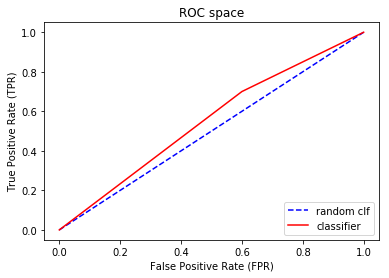

In [246]:
plot_ROC(0.6, 0.7)

## <font color='blue'> 4.1 Dataset tic-tac-toe </font>

In [247]:
db_ttt = Datos("../ConjuntosDatos/tic-tac-toe.data")
db_ttt_sk = Datos("../ConjuntosDatos/tic-tac-toe.data")

np.random.shuffle(db_ttt.datos)
np.random.shuffle(db_ttt_sk.datos)

preprocess_data(db_ttt_sk)

NB = Clasificador.ClasificadorNaiveBayes()
NBSK = Clasificador.ClasificadorNaiveBayesSK(gaussian_feat=False)

### 4.1.1 Validación simple

In [248]:
strat_simple = EstrategiaParticionado.ValidacionSimple(0.8)

In [249]:
fpr_nb, tpr_nb = ROC_Analysis(db_ttt, NB, strat_simple)

+----------+------------+------------+
|          |   REAL POS |   REAL NEG |
+==========+============+============+
| PRED POS |        111 |         41 |
+----------+------------+------------+
| PRED NEG |         13 |         27 |
+----------+------------+------------+
Punto espacio ROC: ( 0.6029411764705882 , 0.8951612903225806 )


In [250]:
fpr_nbsk, tpr_nbsk = ROC_Analysis(db_ttt_sk, NBSK, strat_simple)

+----------+------------+------------+
|          |   REAL POS |   REAL NEG |
+==========+============+============+
| PRED POS |        103 |         43 |
+----------+------------+------------+
| PRED NEG |         16 |         30 |
+----------+------------+------------+
Punto espacio ROC: ( 0.589041095890411 , 0.865546218487395 )


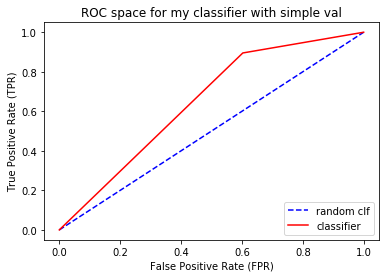

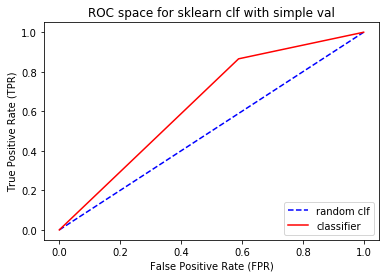

In [251]:
plot_ROC(fpr_nb, tpr_nb, clf_name='my classifier with simple val')
plot_ROC(fpr_nbsk, tpr_nbsk, clf_name='sklearn clf with simple val')

### 4.1.2 Validación simple con varias repeticiones

In [263]:
strat_simple_rep3 = EstrategiaParticionado.ValidacionSimple(0.8, nreps=3)

In [264]:
fpr_nb, tpr_nb = ROC_Analysis(db_ttt, NB, strat_simple_rep3)

+----------+------------+------------+
|          |   REAL POS |   REAL NEG |
+==========+============+============+
| PRED POS |        113 |         33 |
+----------+------------+------------+
| PRED NEG |         16 |         30 |
+----------+------------+------------+
Punto espacio ROC: ( 0.5641534391534391 , 0.849031007751938 )


In [265]:
fpr_nbsk, tpr_nbsk = ROC_Analysis(db_ttt_sk, NBSK, strat_simple_rep3)

+----------+------------+------------+
|          |   REAL POS |   REAL NEG |
+==========+============+============+
| PRED POS |        110 |         36 |
+----------+------------+------------+
| PRED NEG |         15 |         31 |
+----------+------------+------------+
Punto espacio ROC: ( 0.5749378109452736 , 0.8632986111111111 )


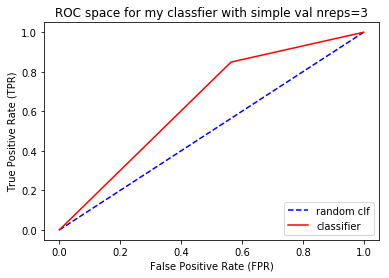

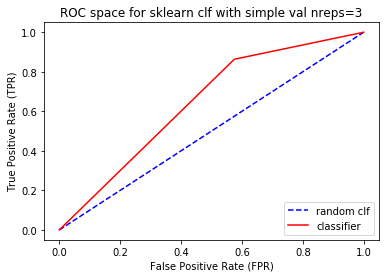

In [266]:
plot_ROC(fpr_nb, tpr_nb, clf_name='my classfier with simple val nreps=3')
plot_ROC(fpr_nbsk, tpr_nbsk, clf_name='sklearn clf with simple val nreps=3')

### 4.1.3 Validación cruzada

In [267]:
strat_cross_val = EstrategiaParticionado.ValidacionCruzada(k_fold=5)

In [268]:
fpr_nb, tpr_nb = ROC_Analysis(db_ttt, NB, strat_cross_val)

+----------+------------+------------+
|          |   REAL POS |   REAL NEG |
+==========+============+============+
| PRED POS |        103 |         39 |
+----------+------------+------------+
| PRED NEG |         23 |         26 |
+----------+------------+------------+
Punto espacio ROC: ( 0.6129515869814377 , 0.8493472813029264 )


In [269]:
fpr_nbsk, tpr_nbsk = ROC_Analysis(db_ttt_sk, NBSK, strat_cross_val)

+----------+------------+------------+
|          |   REAL POS |   REAL NEG |
+==========+============+============+
| PRED POS |        106 |         40 |
+----------+------------+------------+
| PRED NEG |         19 |         26 |
+----------+------------+------------+
Punto espacio ROC: ( 0.5786053394527154 , 0.853613978701287 )


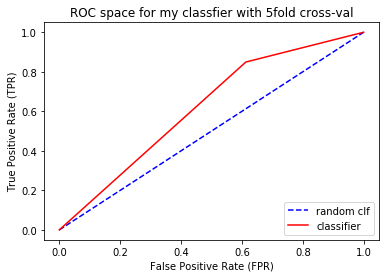

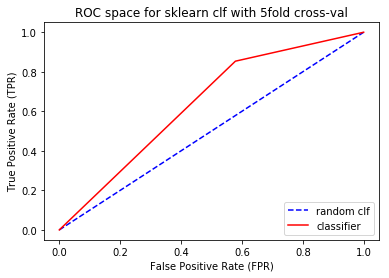

In [270]:
plot_ROC(fpr_nb, tpr_nb, clf_name='my classfier with 5fold cross-val')
plot_ROC(fpr_nbsk, tpr_nbsk, clf_name='sklearn clf with 5fold cross-val')

## <font color='blue'> 4.2 Dataset german </font>

### 4.2.1 Validación simple

### 4.2.2 Validación simple con varias repeticiones

### 4.2.3 Validación cruzada